In [ ]:
!pip install Riskfolio-Lib

[*********************100%%**********************]  5 of 5 completed


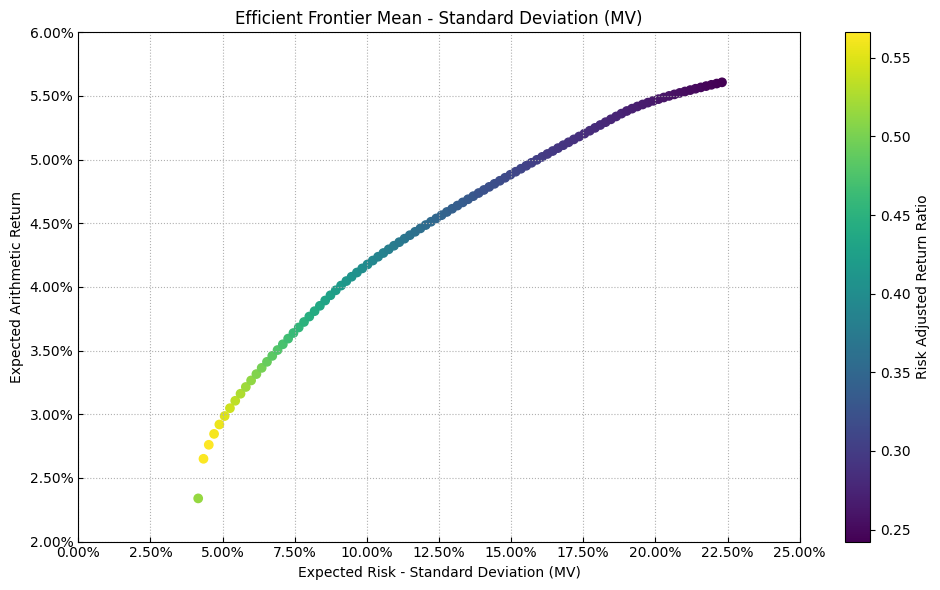

In [ ]:
def MONTHLY_RETURNS(SYMBOLS , FROM , TO):
  from yfinance import download
  DATA = download(tickers=SYMBOLS ,
                  start=FROM, end=TO)
  ADJUSTED = DATA["Adj Close"]
  return ADJUSTED.resample( rule="M" ).last().pct_change().dropna()


EGGS = MONTHLY_RETURNS(SYMBOLS=["HSY","LLY","TSLA","DAL","BTC-USD"] , FROM="2018-6-1" , TO="2023-5-1")
import riskfolio as rf
OBJECT = rf.Portfolio(returns=EGGS)
OBJECT.assets_stats()
WEIGHTS = OBJECT.efficient_frontier(points=100)
PLOT = rf.plot_frontier(w_frontier=WEIGHTS , mu=OBJECT.mu , cov=OBJECT.cov , returns=EGGS , rf=0.002 , t_factor=1)
ALL = WEIGHTS.T
XY = PLOT.collections[0].get_offsets()
ALL[["STD. DEV." , "EXP. MONTHLY RET."]] = XY
ALL["SHARPE RATIO"] = (ALL['EXP. MONTHLY RET.'] - 0.002) / ALL['STD. DEV.']
ALL["SHARPE RATIO"]  =  round( ALL["SHARPE RATIO"] , 4)
import plotly.express as px
INTERACTIVE = px.scatter(
    data_frame=ALL,
    x="STD. DEV.",
    y="EXP. MONTHLY RET.",
    color="SHARPE RATIO" ,
    title="Efficient Frontier" ,
    hover_data = { X  : ":.2%"
                  for X in ALL.columns[:-1] } )
INTERACTIVE.update_layout(
      template="plotly_dark" ,
    font_family="Courier New" ,
    hoverlabel={"font_family" : "Courier New" ,
                    "bgcolor" : "black"} )
INTERACTIVE

In [ ]:
def EFF_FRONT(ASSETS, START, END, POINTS, R_FREE):
  def MONTHLY_RETURNS(SYMBOLS , FROM , TO):
    from yfinance import download
    DATA = download(tickers=SYMBOLS ,
                    start=FROM, end=TO)
    ADJUSTED = DATA["Adj Close"]
    return ADJUSTED.resample( rule="M" ).last().pct_change().dropna()


  EGGS = MONTHLY_RETURNS(SYMBOLS=ASSETS , FROM=START , TO=END)

  import riskfolio as rf
  OBJECT = rf.Portfolio(returns=EGGS)
  OBJECT.assets_stats()
  WEIGHTS = OBJECT.efficient_frontier(points=POINTS)
  PLOT = rf.plot_frontier(w_frontier=WEIGHTS , mu=OBJECT.mu , cov=OBJECT.cov , returns=EGGS , rf=R_FREE , t_factor=1)
  ALL = WEIGHTS.T
  XY = PLOT.collections[0].get_offsets()

  ALL[["STD. DEV." , "EXP. MONTHLY RET."]] = XY
  ALL["SHARPE RATIO"] = (ALL['EXP. MONTHLY RET.'] - R_FREE) / ALL['STD. DEV.']
  ALL["SHARPE RATIO"]  =  round( ALL["SHARPE RATIO"] , 4)

  import plotly.express as px
  INTERACTIVE = px.scatter(
      data_frame=ALL,
      x="STD. DEV.",
      y="EXP. MONTHLY RET.",
      color="SHARPE RATIO" ,
      title="Efficient Frontier" ,
      hover_data = { X  : ":.2%"
                    for X in ALL.columns[:-1] } )
  INTERACTIVE.update_layout(
        template="plotly_dark" ,
      font_family="Courier New" ,
      hoverlabel={"font_family" : "Courier New" ,
                      "bgcolor" : "black"} )
  return INTERACTIVE

[*********************100%%**********************]  5 of 5 completed


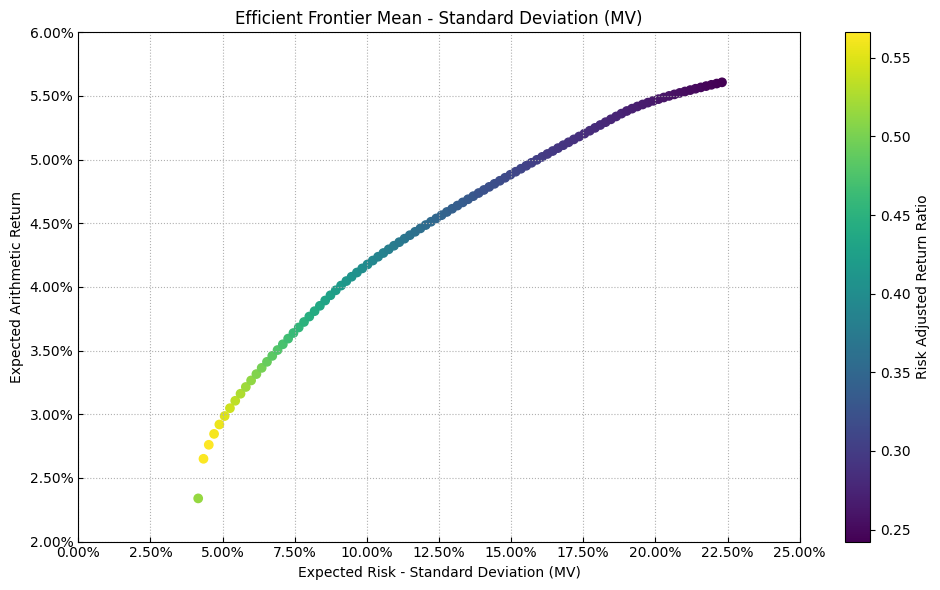

In [ ]:
EFF_FRONT(["HSY","LLY","TSLA","DAL","BTC-USD"], "2018-6-1", "2023-5-1", 100, 0.002)